In [74]:
__author__ = '@Tssp'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=17
plt.rcParams['ytick.labelsize']=17
plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=20

In [75]:
# Loading:
##########
CsvPath = '~/CIEMAT/Rn_Time_Series/AEMET/logs/'
DfDict = {}
for i in range(1, 10):
    try:
        DfDict[f'{i}Fw'] = pd.read_csv(CsvPath + f'Errors{i}Fw.csv')
    except:
        continue

In [76]:
cities = ['Rn', 'BCN', 'PMP', 'ZGZ', 'HSC']
def getMinMeanErrors(DfDict, cities):
    outputCities = []
    outputRn = []
    for nFw in DfDict.keys():
        CityErrors = []
        outputRn.append(DfDict[nFw].describe()['Rn']['mean'])
        for city in cities:
            CityErrors.append(DfDict[nFw].describe()[city]['mean'])
        outputCities.append(np.min(CityErrors))
    return outputCities, outputRn

In [77]:
minsMeanCities, meanRn = getMinMeanErrors(DfDict, cities)
improvement = np.array(meanRn)/np.array(minsMeanCities)

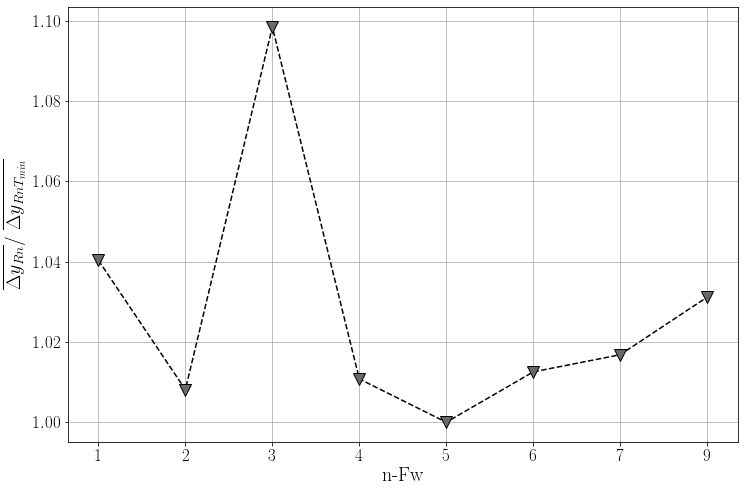

In [133]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(improvement, marker='v', markersize='12', markerfacecolor='dimgray', markeredgecolor='k', color='k', ls='--')
ax.grid()
ax.set_xticks(range(0, 8))
ax.set_xticklabels(labels=[1, 2, 3, 4, 5, 6, 7, 9])
ax.set_xlabel('n-Fw')
ax.set_ylabel('$\overline{\Delta y_{Rn}} / \ \overline{\Delta y_{RnT_{min}}}$')
plt.savefig('../Figures/Paper/Improvementwcolor.eps', dpi=200)